<module 'matplotlib.pyplot' from '/home/raymond/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

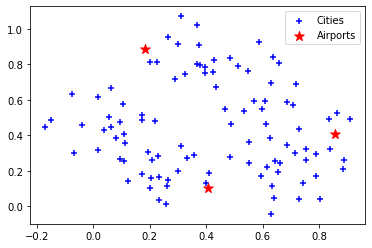

In [48]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [49]:
"""method for getting sum of squared distance between two points"""
def getDistance(point1, point2):
   return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2

"""method that takes in the airports as well as the cities 
   and returns a list containing lists of cities closest to 
   airport i (note: returned list organized by indexing of airports list
   e.g., partitionedCities[0] is the list of cities closest to airport 0) 
   O(a*c)"""
def partitionCitySet(airports, cities):
   partitionedCities = [[] for _ in range(len(airports))]

   for city in cities:
      airportDistances = []
      for airport in airports:
         airportDistances.append(getDistance(city, airport))
      partitionedCities[airportDistances.index(min(airportDistances))].append(city)

   return partitionedCities
      

partitionedCities = partitionCitySet(airports, cities)
def test(x,y,z):
   print(len(x), x, end='\n\n')
   print(len(y), y, end='\n\n')
   print(len(z), z, end='\n\n')
   # print(x + y + z)

test(*partitionedCities) 

29 [(0.5956437364196239, 0.5480877791236979), (0.8038815542761066, 0.043338296177845986), (0.6426552848231283, 0.2535008031041309), (0.7869115708553777, 0.17201449629709992), (0.8836592022423121, 0.2081381773253797), (0.7153172397033473, 0.2998458367881145), (0.8617033774676924, 0.5236799532621835), (0.6263283006366335, 0.38328180397467837), (0.7424590539876248, 0.1322192165892816), (0.532046291031363, 0.5362946076258316), (0.7892890050974171, 0.29434933735022695), (0.8881989145211812, 0.25973681521965264), (0.5679506680000435, 0.5966532515007157), (0.6567241458089287, 0.8100262188618347), (0.6850082900591814, 0.3459753344180504), (0.6610347845674568, 0.2423464810773524), (0.8386823623591493, 0.321761326812689), (0.627597894583082, 0.6973278907763103), (0.4645921963681475, 0.5505062233641965), (0.6091167905227125, 0.5944852130736841), (0.7514975539609925, 0.2603474621303046), (0.8355105723945045, 0.4950814762918495), (0.7513928081965384, 0.3252194513601254), (0.6120069384683602, 0.4616

In [50]:
import copy
"""Implementation of objective function: O(abc)"""
def objectiveFun(airports, cities):
    classifiedCities = partitionCitySet(airports, cities)
    objFunStartingVal = 0

    for airport in airports:
        for cityCluster in classifiedCities:
            for city in cityCluster:
                objFunStartingVal += getDistance(airport, city)
                
    return objFunStartingVal

'''Implementation of gradient descent
   Note: the returned airports that I'm getting are all the same coordinates idk why'''
def gDescent(cities, airports, alpha, iterations):
    classifiedCities = partitionCitySet(airports, cities)
    newAirportCoordinates = []
    objectiveFunVals = []
    
    for _ in range(iterations):
        objectiveFunVals.append(objectiveFun(airports, cities))
        currentAirport = 0
        for airport in airports:
            dx = 0
            dy = 0
            
            for city in classifiedCities[currentAirport]:
                dx += 2 * (airport[0] - city[0])
                dy += 2 * (airport[1] - city[1])
            
            deltaCoordinates = (dx, dy)
            alphaTimesdxdy = tuple(map(lambda value: alpha * value, deltaCoordinates))
            newAirportLocation = tuple(map(lambda x,y: x-y, airport, alphaTimesdxdy))
            newAirportCoordinates.append(newAirportLocation)
            currentAirport += 1
            
        airports = copy.deepcopy(newAirportCoordinates)
        newAirportCoordinates.clear()

    return airports, objectiveFunVals

print(f'objective fun before first iteration of gDescent {objectiveFun(airports, cities)}')
newAirports, objFun = gDescent(cities, airports, 0.0069, 50)
print(f'Airport Coordinates: {newAirports}\nnew objective fun val: {objFun}')


objective fun before first iteration of gDescent 98.69433385968253
Airport Coordinates: [(0.7129130941009332, 0.41846456144959365), (0.25133864310263726, 0.7068268952876502), (0.32480259023264324, 0.21531958146539495)]
new objective fun val: [98.69433385968253, 82.23975210976417, 74.74419828037712, 71.06372466567962, 69.16428830319384, 68.15250727129504, 67.60243875416408, 67.29917666566267, 67.13024091677198, 67.03534844417209, 66.98166902633288, 66.95111343606013, 66.93362248377748, 66.92355883000882, 66.91774153304576, 66.91436455595223, 66.9123966495017, 66.91124588262832, 66.91057085259803, 66.91017378203821, 66.90993963565431, 66.9098012600946, 66.90971932475294, 66.90967072640606, 66.90964185826996, 66.90962468783016, 66.90961446344916, 66.90960836918245, 66.90960473356417, 66.90960256307343, 66.90960126644033, 66.9096004914112, 66.90960002793462, 66.90959975065515, 66.90959958471043, 66.90959948536614, 66.90959942587696, 66.90959939024557, 66.9095993688998, 66.90959935610992, 6

New Coordinates of Airports [(0.7129182785674151, 0.4184641715442833), (0.2513385157399253, 0.7068272332093163), (0.32480267892550513, 0.2153194604489327)]


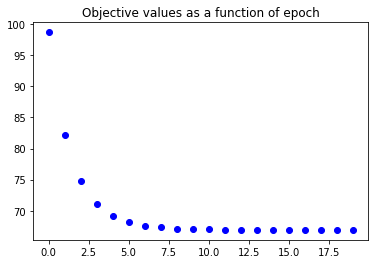

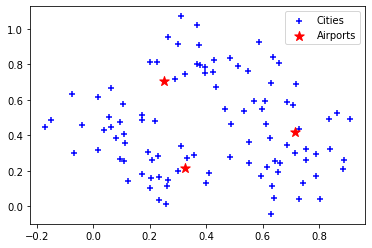

In [51]:
def main():
    iterations = 20
    alpha = 0.0069
    airportCoordinates, objectiveFunVals = gDescent(cities, airports, alpha, iterations)
    print(f'New Coordinates of Airports {airportCoordinates}')
    # print(f"Objective function values as a function of iterations: {objectiveFunVals}")



    plt.figure(0)
    plt.title("Objective values as a function of epoch")
    plt.plot(range(iterations), objectiveFunVals, "o" ,color="blue")



    plt.figure(1)
    # plt.title("Optimized airport locations")
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+', color='b', label='Cities')
    zip_airs = zip(*airportCoordinates)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt
    

main()
